In [1]:
#Download SNP500 data from 1973 to 2023
#use Yahoo Finance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta


In [83]:
import yfinance as yf

# Download data for the S&P 500 index from 2020 to 2022
ticker = "SPY"
start_date = "1973-01-01"
end_date = "2022-05-07"
sp500_data = yf.download(ticker, start=start_date, end=end_date)

# Print the first 5 rows of the data
print(sp500_data.head())

[*********************100%***********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close   Volume
Date                                                                  
1993-01-29  43.96875  43.96875  43.75000  43.93750  25.122343  1003200
1993-02-01  43.96875  44.25000  43.96875  44.25000  25.301020   480500
1993-02-02  44.21875  44.37500  44.12500  44.34375  25.354628   201300
1993-02-03  44.40625  44.84375  44.37500  44.81250  25.622656   529400
1993-02-04  44.96875  45.09375  44.46875  45.00000  25.729849   531500


<Axes: xlabel='Date'>

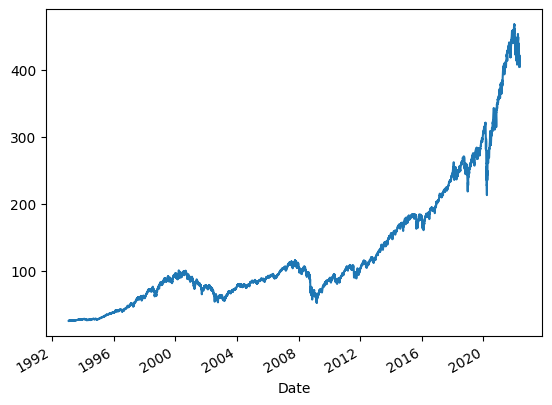

In [84]:
# Plot the adjusted close price
sp500_data["Adj Close"].plot()

In [85]:
#get percent growth from start to end
start_price = sp500_data["Adj Close"][0]
end_price = sp500_data["Adj Close"][-1]
percent_growth = (end_price-start_price)/start_price
print(percent_growth)

15.100687682341885


In [86]:
dataset = pd.DataFrame(sp500_data["Adj Close"])

In [87]:
#get the most important technical indicators
ma_50 = sp500_data["Adj Close"].rolling(window=50).mean()
ma_200 = sp500_data["Adj Close"].rolling(window=200).mean()
ema_50 = sp500_data["Adj Close"].ewm(span=50, adjust=False).mean()
ema_200 = sp500_data["Adj Close"].ewm(span=200, adjust=False).mean()

#get the RSI (relative strength index)
#RSI = 100 - 100/(1 + RS)
rsi = ta.momentum.RSIIndicator(sp500_data["Adj Close"], window=14).rsi()

# Download VIX data from Yahoo Finance
vix = yf.download('^VIX', start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed


In [88]:
dataset['ma_50'] = ma_50
dataset['ma_200'] = ma_200
dataset['ema_50'] = ema_50
dataset['ema_200'] = ema_200
dataset['rsi'] = rsi

<Axes: xlabel='Date'>

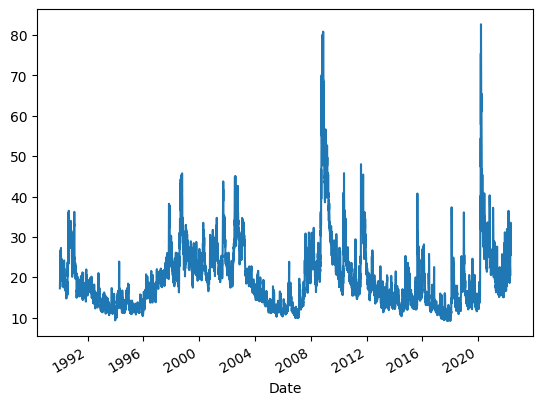

In [89]:
#plot vix
vix["Adj Close"].plot()

In [90]:
#GDP growth, inflation rates, and employment data
import pandas_datareader.data as web


In [91]:
gdp = web.DataReader('GDPC1', 'fred', start_date, end_date)
inflation = web.DataReader('CPIAUCSL', 'fred', start_date, end_date)
unemployment = web.DataReader('UNRATE', 'fred', start_date, end_date)

In [92]:
#convert inflation to inflatin rate
inflation_rate = inflation.pct_change()
#add smoothed inflation rate
inflation_rate['inflation_rate_12m'] = inflation_rate['CPIAUCSL'].rolling(window=12).mean()

In [93]:
dataset

,Adj Close,ma_50,ma_200,ema_50,ema_200,rsi
Date,,,,,,
1993-01-29,25.122343,NaN,NaN,25.122343,25.122343,NaN
1993-02-01,25.301020,NaN,NaN,25.129350,25.124121,NaN
1993-02-02,25.354628,NaN,NaN,25.138184,25.126415,NaN
1993-02-03,25.622656,NaN,NaN,25.157183,25.131352,NaN
1993-02-04,25.729849,NaN,NaN,25.179641,25.137307,NaN
...,...,...,...,...,...,...
2022-05-02,407.574677,428.964695,438.319296,430.507118,429.266121,37.282287
2022-05-03,409.443024,428.640091,438.297453,429.681075,429.068877,38.812633
2022-05-04,421.911743,428.656225,438.308304,429.376396,428.997661,47.941915


<Axes: xlabel='DATE'>

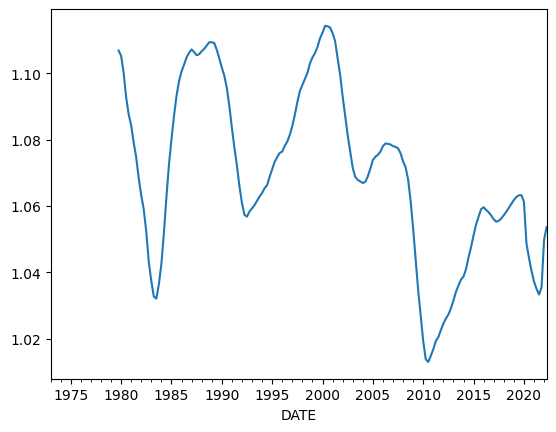

In [94]:
#calculate moving average of GDP
gdp['gdp_7m'] = gdp['GDPC1'].rolling(window=7).mean()
gdp['gdp_28m'] = gdp['GDPC1'].rolling(window=28).mean()
gdp['gdp_ratio'] = (gdp['gdp_7m']/gdp['gdp_28m'])
#plot gdp
gdp['gdp_ratio'].plot()

In [95]:
dataset['gdp_ratio'] = gdp['gdp_ratio']
dataset['unemployment'] = unemployment['UNRATE']
dataset['inflation_rate'] = inflation_rate['inflation_rate_12m']


In [96]:
# merge dataset and gdp on Date and DATE 

The Put call ratio should be a good indicator, yet it is recent, and may not be available into the 1970s

<Axes: xlabel='DATE'>

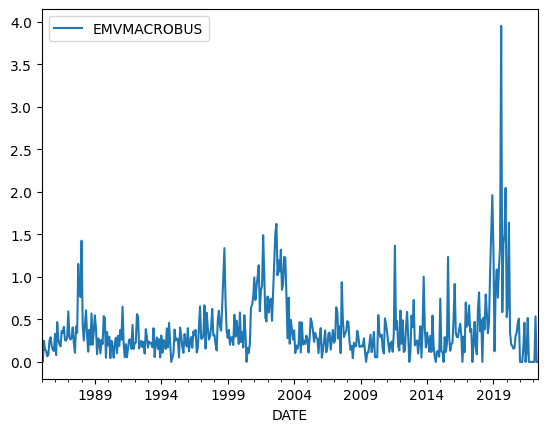

In [97]:
#investor Intelligence Sentiment Index
consumer_sentimet = web.DataReader('UMCSENT', 'fred', start_date, end_date)
equity_volatility = web.DataReader('EMVMACROBUS', 'fred', start_date, end_date)
#plot iis
equity_volatility.plot()

In [98]:
dataset['consumer_sentimet'] = consumer_sentimet['UMCSENT']
dataset['equity_volatility'] = equity_volatility['EMVMACROBUS']

In [99]:
#get the columns
print(dataset.columns)

Index(['Adj Close', 'ma_50', 'ma_200', 'ema_50', 'ema_200', 'rsi', 'gdp_ratio',
       'unemployment', 'inflation_rate', 'consumer_sentimet',
       'equity_volatility'],
      dtype='object')


In [100]:
dataset.columns

Index(['Adj Close', 'ma_50', 'ma_200', 'ema_50', 'ema_200', 'rsi', 'gdp_ratio',
       'unemployment', 'inflation_rate', 'consumer_sentimet',
       'equity_volatility'],
      dtype='object')

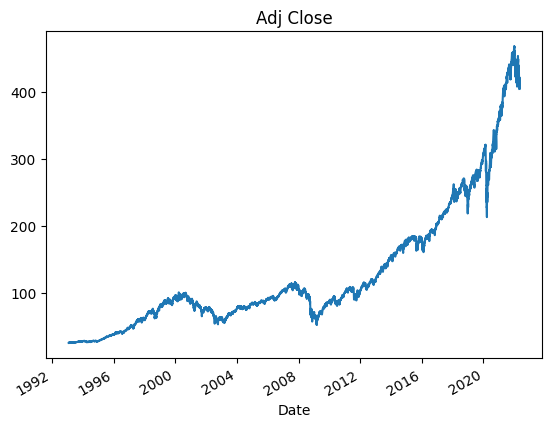

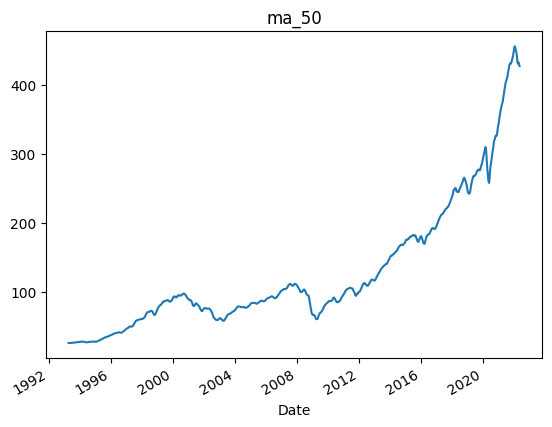

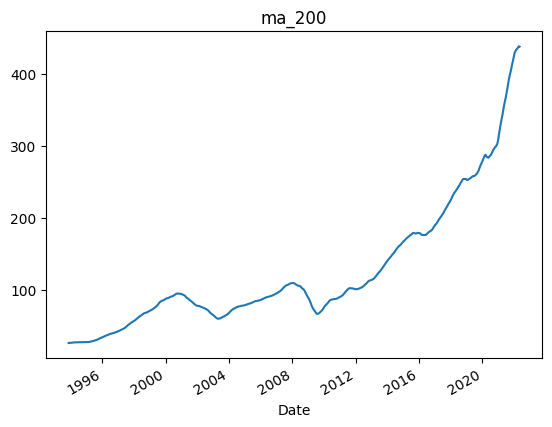

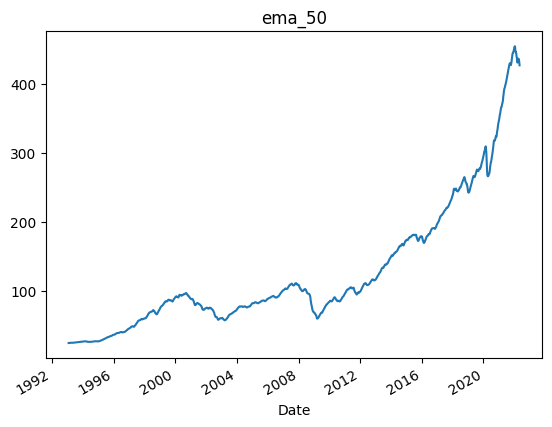

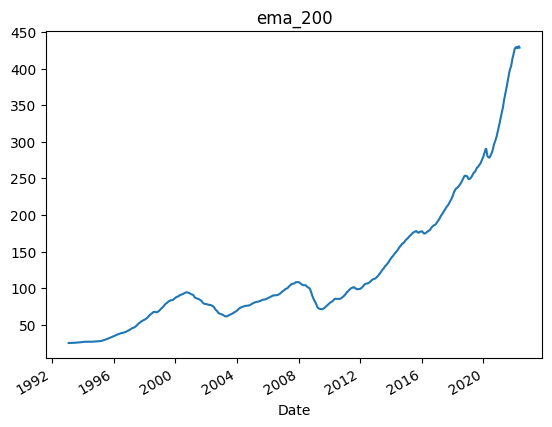

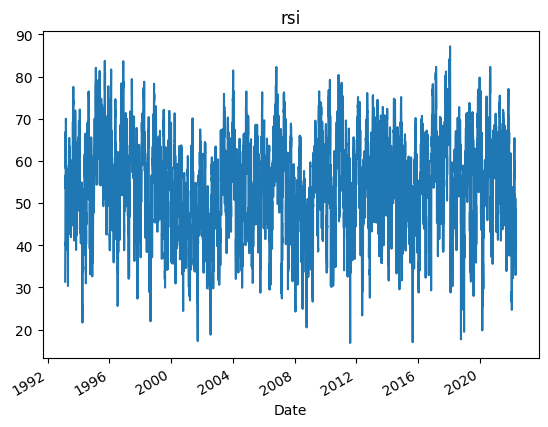

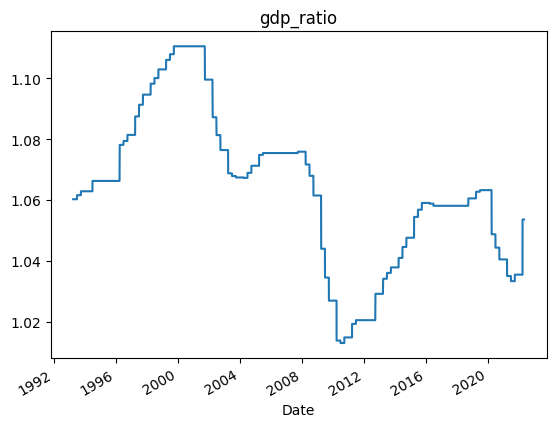

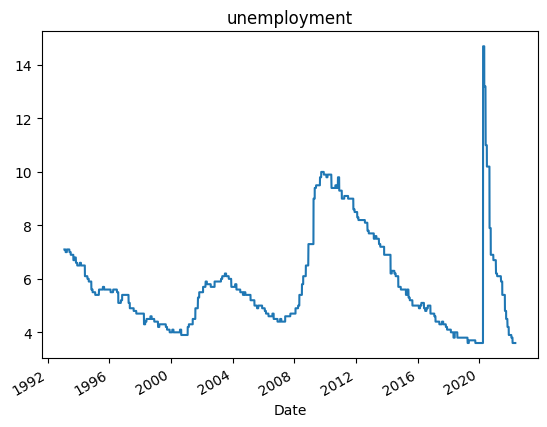

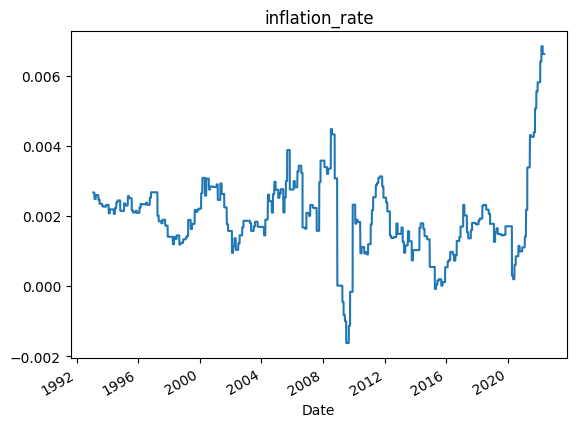

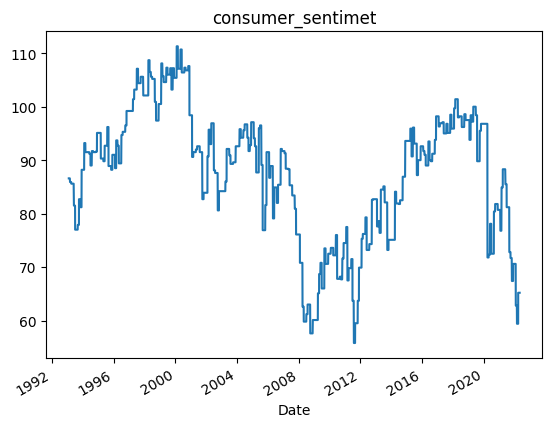

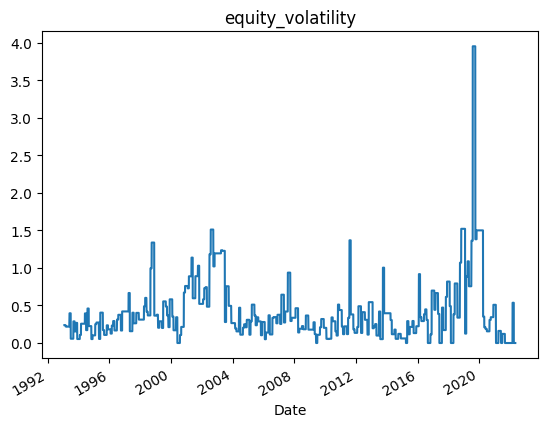

In [101]:
#plot the data for each column
for column in dataset.columns:
    dataset[column].fillna(method='ffill').plot()
    plt.title(column)
    plt.show()

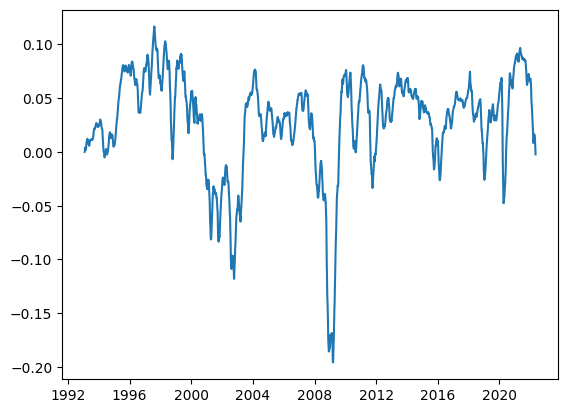

In [102]:
#ema50 - ema200
dataset['norm_ema_ratio'] = (dataset['ema_50'] - dataset['ema_200'])/dataset['ema_200']
plt.plot(dataset['norm_ema_ratio'])

# Create a new column that identifies when the EMAs cross over each other
dataset["EMA_crossover"] = ((dataset['norm_ema_ratio'].shift(1) < 0) & (dataset['norm_ema_ratio'] > 0)).astype(int)


In [103]:
#rsa moving average
dataset['rsi_ma_50'] = dataset['rsi'].rolling(window=50).mean()
dataset['rsi_ma_200'] = dataset['rsi'].rolling(window=200).mean()

In [104]:
dataset['Adj Close'].shift(1)

Date
1993-01-29           NaN
1993-02-01     25.122343
1993-02-02     25.301020
1993-02-03     25.354628
1993-02-04     25.622656
                 ...    
2022-05-02    405.135986
2022-05-03    407.574677
2022-05-04    409.443024
2022-05-05    421.911743
2022-05-06    406.915833
Name: Adj Close, Length: 7372, dtype: float64

In [105]:
# Calculate the rolling mean over a window of thirty days
rolling_mean = dataset['Adj Close'].rolling(window=60).mean()
dataset['percent_increase_smooth'] = (dataset['Adj Close'].shift(-60) - rolling_mean) / rolling_mean * 100

<Axes: xlabel='Date'>

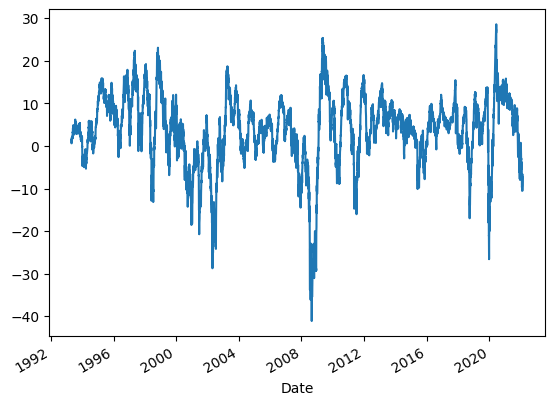

In [106]:
#plot percent increase smooth
dataset['percent_increase_smooth'].plot()

In [107]:
print(dataset.columns)
cols_to_model = ['rsi', 'norm_ema_ratio', 'EMA_crossover', 'gdp_ratio',
       'unemployment', 'inflation_rate', 'consumer_sentimet',
       'equity_volatility', 'rsi_ma_50',
       'rsi_ma_200']
percent_inc = (dataset['Adj Close'].shift(-1)/dataset['Adj Close'] - 1)
#find the percent increase over the next 30 days
percent_inc_30 = dataset['percent_increase_smooth']
percent_inc = (dataset['Adj Close'].shift(-30) / dataset['Adj Close'] - 1) * 100 / 30
y = percent_inc_30.shift(-1)
dataset['pct_growth'] = y
dataset = dataset[:-31]

Index(['Adj Close', 'ma_50', 'ma_200', 'ema_50', 'ema_200', 'rsi', 'gdp_ratio',
       'unemployment', 'inflation_rate', 'consumer_sentimet',
       'equity_volatility', 'norm_ema_ratio', 'EMA_crossover', 'rsi_ma_50',
       'rsi_ma_200', 'percent_increase_smooth'],
      dtype='object')


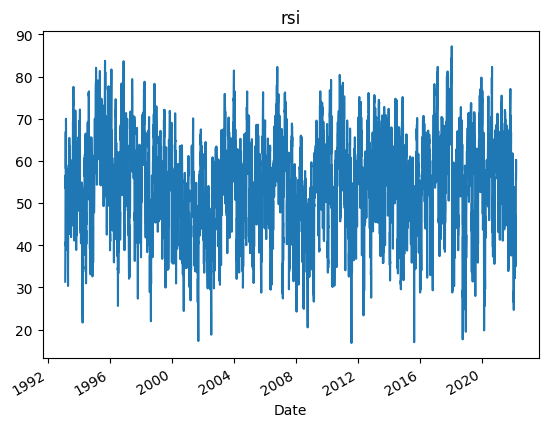

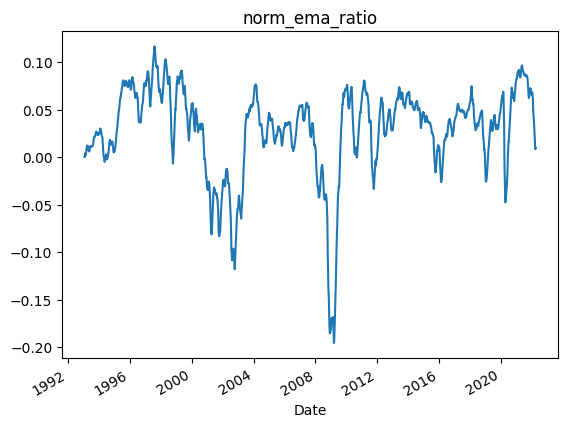

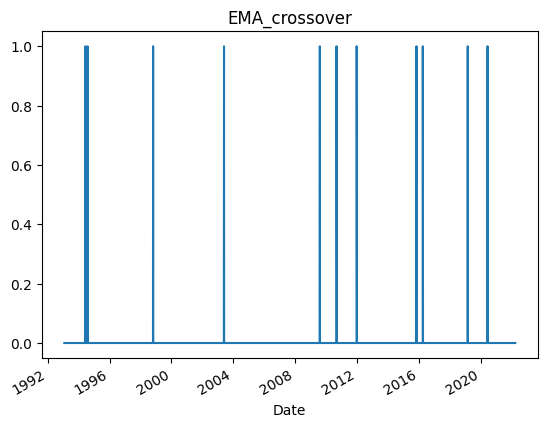

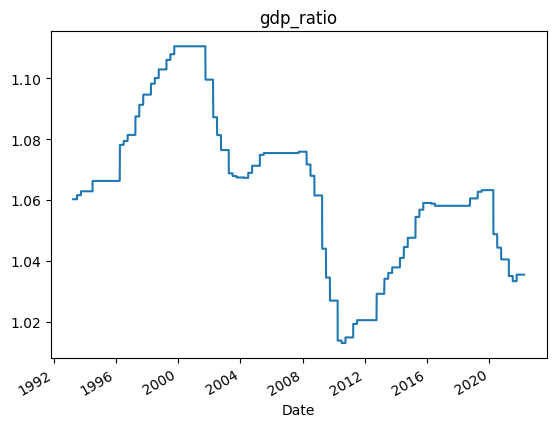

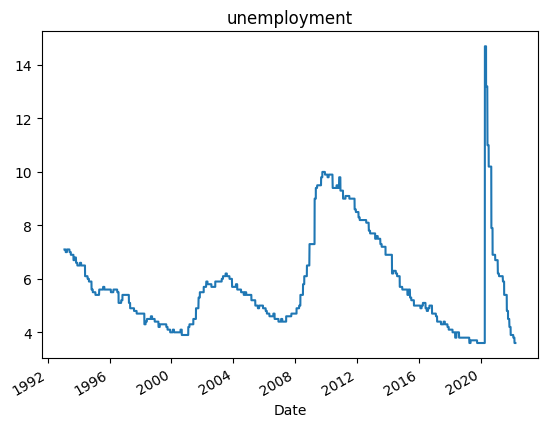

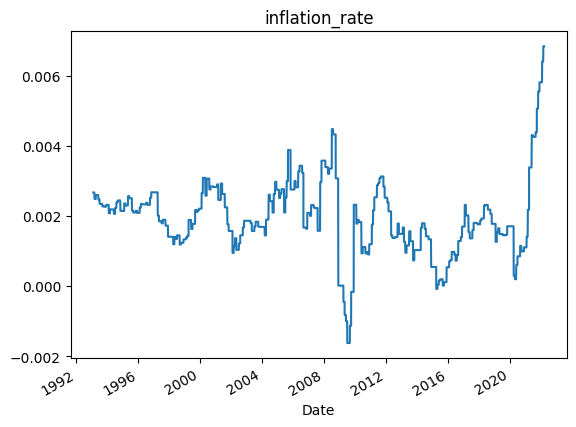

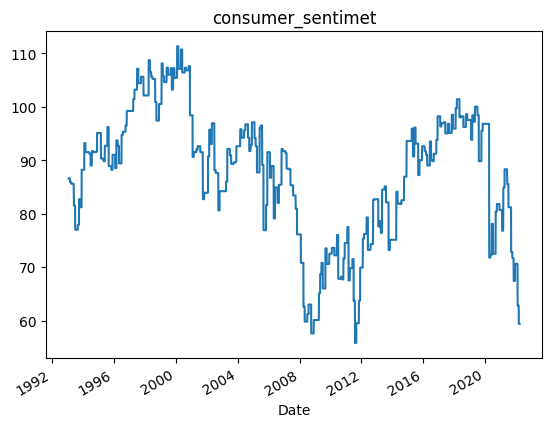

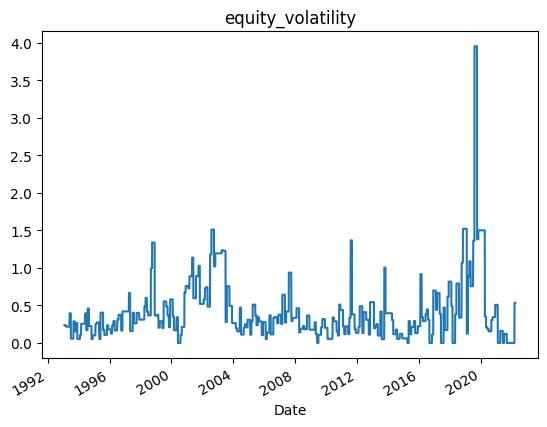

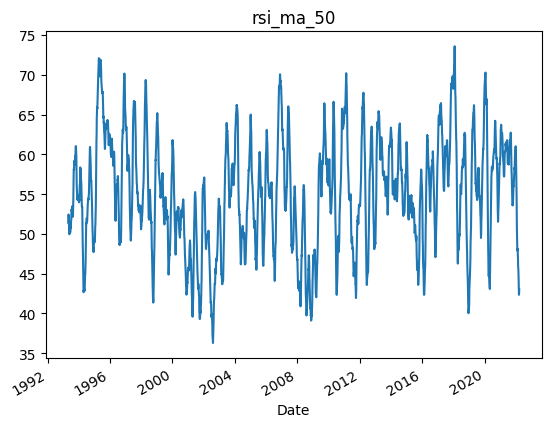

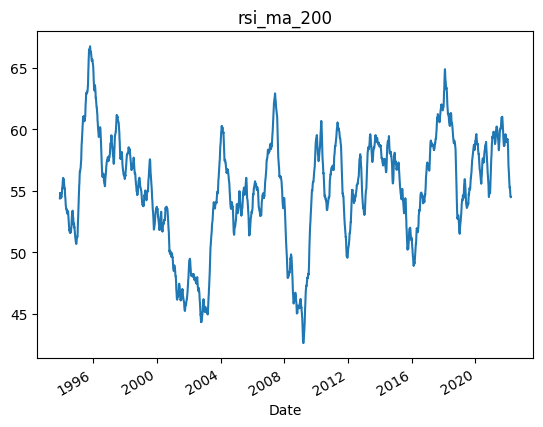

In [108]:

for column in cols_to_model:
    dataset[column].fillna(method='ffill').plot()
    plt.title(column)
    plt.show()

In [109]:
dataset['pct_growth'].median()

4.749887261179077

In [110]:
#get num na values in dataset['pct_growth']
dataset['pct_growth'].isna().sum()
dataset['y'] = .5
dataset.loc[dataset['pct_growth'] > dataset['pct_growth'].median(), 'y'] = 1
dataset.loc[dataset['pct_growth'] < dataset['pct_growth'].median(), 'y'] = 0

/var/folders/kw/ctl5wqn52yg9nswjwqzcv8s40000gn/T/ipykernel_13083/711745084.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['y'] = .5


In [111]:
#get number of 1s and 0s
dataset['y'].value_counts()


y
0.0    3626
1.0    3626
0.5      89
Name: count, dtype: int64

In [112]:
X = dataset[cols_to_model].fillna(method='ffill')
y = dataset['y']
pct_change =  dataset['pct_growth']

In [113]:
#get nan values in X
X.isna().sum()

rsi                   13
norm_ema_ratio         0
EMA_crossover          0
gdp_ratio             43
unemployment           1
inflation_rate         1
consumer_sentimet      1
equity_volatility      1
rsi_ma_50             62
rsi_ma_200           212
dtype: int64

In [114]:
X = X[212:]
y = y[212:]
dates = dataset.index[212:]
pct_change = pct_change[212:]

In [115]:
len(X)

7129

In [116]:
len(dates)

7129

In [117]:
#get nan values in X
X.isna().sum()

rsi                  0
norm_ema_ratio       0
EMA_crossover        0
gdp_ratio            0
unemployment         0
inflation_rate       0
consumer_sentimet    0
equity_volatility    0
rsi_ma_50            0
rsi_ma_200           0
dtype: int64

In [118]:
#drop values where y is 0
X = X[y != .5]
pct_change = pct_change[y != .5]
dates = dates[y != .5]
y = y[y != .5]


In [132]:
#seperate the data into 
#split the training into 5 fold cross validation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()

seed = 42

kf = KFold(n_splits=5, shuffle=False)

#split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, shuffle=False)
# # Fit the scaler to your data to calculate the mean and standard deviation

scaler.fit(X_train)

#get nan values in dataset
print(X_train.isna().sum())

# # Apply the scaler to your data to transform it to a normalized form
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#count number of nan values in X_train_scaled
print(np.isinf(X_train_scaled).sum())

#split train into 5 fold cross validation
kf = KFold(n_splits=5, shuffle=False)

scores = []
correlations = []
preds = []
gt = []
for train_idx, val_idx in kf.split(X_train_scaled):
    # split the data into training and validation sets for this fold
    train_X, val_X = X_train_scaled[train_idx], X_train_scaled[val_idx]
    train_y, val_y = y_train[train_idx], y_train[val_idx]

    pct_change_train, pct_change_val = pct_change[train_idx], pct_change[val_idx]
    #trainX and Y where percent_change < 0 or > 10
    median = 4
    dist = 6
    train_X = train_X[(pct_change_train < median-dist) | (pct_change_train > median+dist)]
    train_y = train_y[(pct_change_train < median-dist) | (pct_change_train > median+dist)]

    #count number of nan values in X_train_scaled
    print(np.isnan(train_y).sum())

    # fit the model for this fold
    model = LogisticRegression(C=.01, solver='lbfgs', max_iter=1000)
    model.fit(train_X, train_y)

    #predict for this fold
    pred = model.predict(val_X)
    preds.append(pred)
    gt.append(val_y)

    #calculate rmse for this fold
    rmse = np.sqrt(np.mean((model.predict(val_X) - val_y) ** 2))
    scores.append(rmse)

    #calculate correlation for this fold
    corr = np.corrcoef(model.predict(val_X), val_y)[0, 1]
    correlations.append(corr)

print(scores)
print(correlations)

rsi                  0
norm_ema_ratio       0
EMA_crossover        0
gdp_ratio            0
unemployment         0
inflation_rate       0
consumer_sentimet    0
equity_volatility    0
rsi_ma_50            0
rsi_ma_200           0
dtype: int64
0
0
0
0
0
0
[0.678518477230843, 0.7736869840547757, 0.6102123851001202, 0.6683532264022451, 0.6768676234949363]
[0.2814568903916824, 0.14770692506175595, 0.2608225845095668, 0.16770941497413205, 0.03947199737363481]


In [133]:
# for train_idx, val_idx in kf.split(X_train_scaled):
#     min_val_idx = min(val_idx)
#     max_val_idx = max(val_idx)
#     train_idx = [i for i in train_idx if i < min_val_idx-30 and i > max_val_idx]

In [134]:
len(y)

7098

In [135]:
#create use XGBoost model for regression
import xgboost as xgb
from sklearn.metrics import mean_squared_error

scaler = StandardScaler()

seed = 42

kf = KFold(n_splits=5, shuffle=False)

#split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, shuffle=False)

# # Fit the scaler to your data to calculate the mean and standard deviation
scaler.fit(X_train)

#get nan values in dataset
print(X_train.isna().sum())

# # Apply the scaler to your data to transform it to a normalized form
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#split train into 5 fold cross validation
kf = KFold(n_splits=5, shuffle=False)


rsi                  0
norm_ema_ratio       0
EMA_crossover        0
gdp_ratio            0
unemployment         0
inflation_rate       0
consumer_sentimet    0
equity_volatility    0
rsi_ma_50            0
rsi_ma_200           0
dtype: int64


In [136]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

param_distributions = {
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'max_depth': [3, 5, 7],
    'n_estimators': [10, 50, 100],
    'alpha': [0, 1, 10],
    'colsample_bytree': [0.3, 0.5, 0.7]
}

# Define the hyperparameter search space
param_dist = {
    'max_depth': randint(1, 10),
    'learning_rate': uniform(0.01, 0.5),
    'n_estimators': randint(50, 500),
    'min_child_weight': randint(1, 10),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'gamma': uniform(0, 2)
}

xgb_reg = xgb.XGBClassifier(objective='binary:logistic')
xgb_cv = RandomizedSearchCV(xgb_reg, param_dist, cv=kf, n_iter=100, random_state=42, n_jobs=-1)

xgb_cv.fit(X_train_scaled, y_train)

print(xgb_cv.best_params_)


# xgb_model = xgb.XGBRegressor(**xgb_cv.best_params_)
# xgb_model.fit(X_train_scaled, y_train)

# # Evaluate on test set
# test_pred = xgb_model.predict(X_test_scaled)
# test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
# test_corr = np.corrcoef(test_pred, y_test)[0, 1]

# print('Test RMSE:', test_rmse)
# print('Test correlation:', test_corr)

{'colsample_bytree': 0.5610191174223894, 'gamma': 0.9903538202225404, 'learning_rate': 0.0271942605576092, 'max_depth': 1, 'min_child_weight': 4, 'n_estimators': 99, 'subsample': 0.831261142176991}


In [139]:
configs = xgb_cv.best_params_

train_scores = []
scores = []
correlations = []
preds = []
gt = []
for train_idx, val_idx in kf.split(X_train_scaled):

    min_val_idx = min(val_idx)
    max_val_idx = max(val_idx)
    train_idx = [i for i in train_idx if i < min_val_idx-30 or i > max_val_idx]

    # split the data into training and validation sets for this fold
    train_X, val_X = X_train_scaled[train_idx], X_train_scaled[val_idx]
    train_y, val_y = y_train[train_idx], y_train[val_idx]
    
    #load xgb model from config
    xgb_model = xgb.XGBClassifier(objective='binary:logistic', **configs)


    
    model.fit(train_X, train_y)

    #predict for this fold
    pred = model.predict_proba(val_X)[:,1]
    preds.append(pred)
    gt.append(val_y)

    train_rmse = np.sqrt(mean_squared_error(train_y, model.predict(train_X)))
    train_scores.append(train_rmse)

    #calculate rmse for this fold
    rmse = np.sqrt(np.mean((model.predict(val_X) - val_y) ** 2))
    scores.append(rmse)

    #calculate correlation for this fold
    corr = np.corrcoef(model.predict(val_X), val_y)[0, 1]
    correlations.append(corr)

print(train_scores)
print(scores)
print(correlations)

[0.5459913561461844, 0.5696210012862789, 0.5504269780416186, 0.5371218569458442, 0.5224836289083973]
[0.6817541583256872, 0.6554215931663622, 0.6411642139856019, 0.673605591865203, 0.6794659732544174]
[0.2468830313771886, 0.26038382984409725, 0.2026966176297107, 0.10270158688368833, 0.028586278659497723]


In [140]:
len(preds)

5

In [141]:
preds

[array([0.31188286, 0.34353127, 0.39050424, ..., 0.3806112 , 0.32312487,
        0.33446504]),
 array([0.56765232, 0.47145048, 0.59700383, ..., 0.68882023, 0.64753701,
        0.67283811]),
 array([0.23842784, 0.27888684, 0.28167372, ..., 0.49066119, 0.59690216,
        0.63301369]),
 array([0.79754344, 0.79050228, 0.80088563, ..., 0.40291859, 0.34779746,
        0.31716183]),
 array([0.26641861, 0.27755444, 0.28204454, ..., 0.66817929, 0.63190724,
        0.69541411])]

Text(0, 0.5, 'Actual')

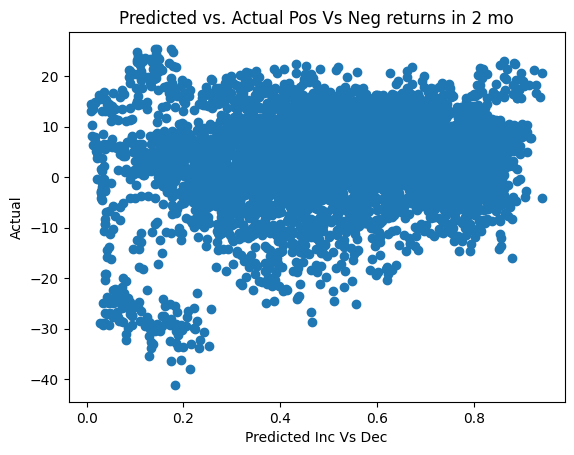

In [142]:
gt = pct_change[:int(len(pct_change)*.8)]
gt_test = pct_change[int(len(pct_change)*.8):]

exp_preds = np.concatenate(preds)
plt.scatter(exp_preds, gt)
plt.title('Predicted vs. Actual Pos Vs Neg returns in 2 mo')
plt.xlabel('Predicted Inc Vs Dec')
plt.ylabel('Actual')
#plot a histogram of the scores
# for i in zip(preds, gt):
#     # scatter plot
#     plt.scatter(i[0], i[1])


In [143]:
from sklearn.metrics import roc_auc_score
#calculate the ROC score for the model
roc_score = roc_auc_score(y_train, exp_preds)
print(roc_score)

0.5626521343825943


In [144]:
len(dates[:int(.8*len(dates))])

5678

In [145]:
len(y_train)

5678

Text(0.5, -0.11, 'Predictions from basic xgboost logistic regression. Y is increase in price in 2 months over current avg. \nFor training, it is filtered to remove avg points. The overall AUC score is .55. \n Please see the code in cache_notebooks/snp500_xgboost_classification.ipynb')

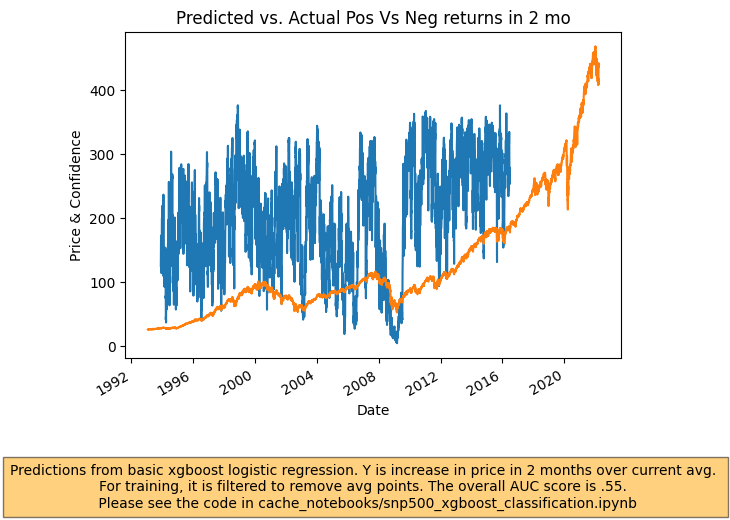

In [168]:
#plot exp_preds as a function of time
plt.plot(dates[:int(.8*len(dates))],exp_preds*400)
#plot dataset with adjusted close
dataset['Adj Close'].plot()
plt.title('Predicted vs. Actual Pos Vs Neg returns in 2 mo')
plt.xlabel('Date')
plt.ylabel('Price & Confidence')
#add caption below plot
text = "Predictions from basic xgboost logistic regression. Y is increase in price in 2 months over current avg. \n"+\
        "For training, it is filtered to remove avg points. The overall AUC score is .55. \n Please see the code in cache_notebooks/snp500_xgboost_classification.ipynb"
plt.figtext(0.5, -0.11, text, ha='center', fontsize=10, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

#save plot to cache_notebooks/snp500_xgboost_classification.ipynb
plt.savefig('../cache_notebooks/snp500_xgboost_classification.png', bbox_inches='tight')

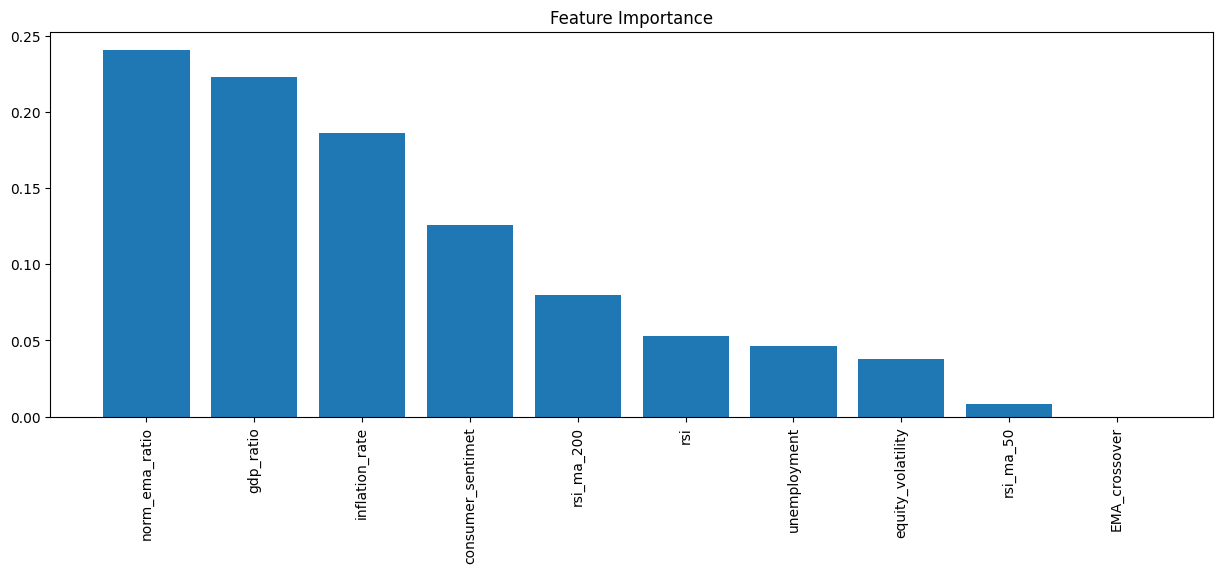

In [77]:
#find the most important features in the model
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_train.columns[i] for i in indices]

#plot the most important features
plt.figure(figsize=(15, 5))
plt.title("Feature Importance")
plt.bar(range(X_train_scaled.shape[1]), importances[indices])
plt.xticks(range(X_train_scaled.shape[1]), names, rotation=90)
plt.show()

In [78]:
test_pred = xgb_cv.predict_proba(X_test_scaled)

In [80]:
test_pred.shape

(580, 2)

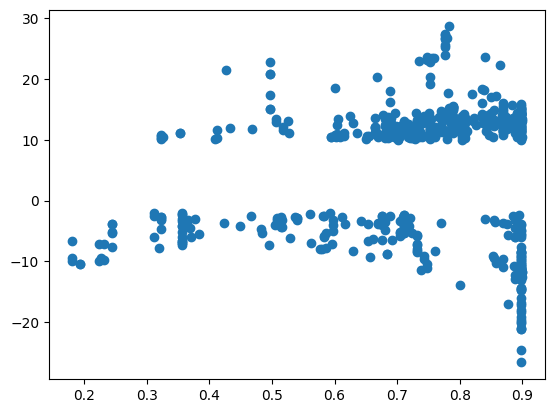

In [85]:
#plot a scatter of the test predictions vs y_test
plt.scatter(test_pred[:,1], gt_test)

In [87]:
#calculat ROC AUC score for test set
roc_score = roc_auc_score(y_test, test_pred[:,1])
print(roc_score)

0.5864221364221365


/Users/andrew/opt/anaconda3/envs/trading_modeling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


<Axes: xlabel='Date'>

/Users/andrew/opt/anaconda3/envs/trading_modeling/lib/python3.11/site-packages/matplotlib/ticker.py:2094: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


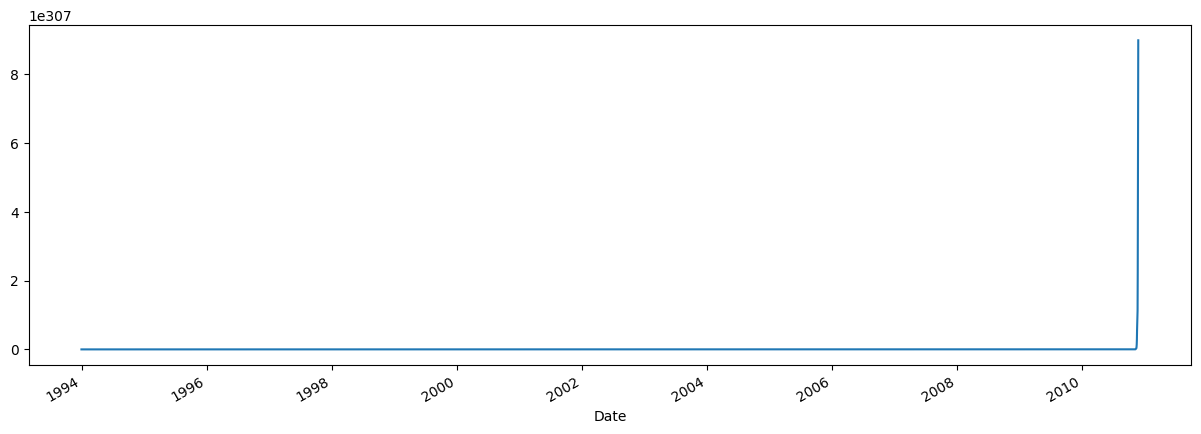

In [88]:
pct_change = (1+y_train).cumprod()
pct_change.plot(figsize=(15, 5))

ValueError: x and y must have same first dimension, but have shapes (5703,) and (2316,)

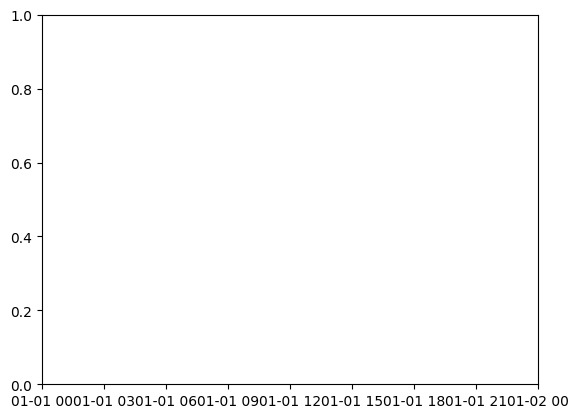

In [90]:
#extract preds into a list
preds_list = []
for i in preds:
    for j in i:
        preds_list.append(j)

preds_ma = pd.Series(preds_list).rolling(50).mean()

#plot preds
#plt.plot(dates[:int(.8*len(dates))],preds_list)
plt.plot(dates[:int(.8*len(dates))],preds_ma)

ValueError: x and y must have same first dimension, but have shapes (5703,) and (2316,)

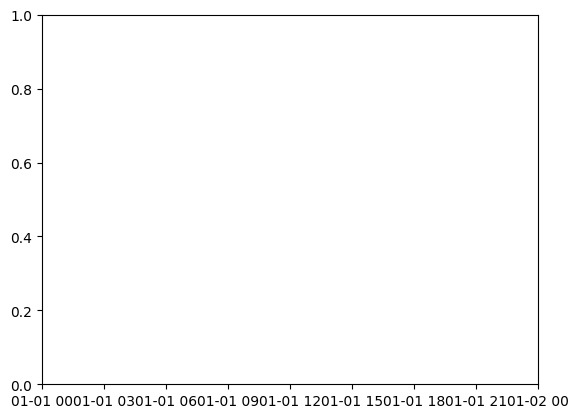

In [ ]:
#signal = preds_list>.2
signal = pd.Series(preds_list)>.2
signal_ma = pd.Series(signal).rolling(3).mean() > 0


#plot signal
plt.plot(dates[:int(.8*len(dates))],signal_ma/10)
plt.plot(dates[:int(.8*len(dates))],preds_ma)

In [ ]:
srt_dataset = dataset.iloc[212:]
srt_dataset = srt_dataset[:int(.8*len(srt_dataset))]
len(srt_dataset)

5703

In [ ]:
srt_dataset['strategy'] = signal.shift(1).values

ValueError: Length of values (2316) does not match length of index (5703)

In [ ]:
#Strategy

In [ ]:
len(dates[:int(.8*len(dates))])
srt_dataset['returns'] = srt_dataset['Adj Close'].pct_change() * srt_dataset['strategy']
srt_dataset['cumulative_returns'] = (1 + srt_dataset['returns']).cumprod()

#plot cumulative returns
plt.plot(srt_dataset.index, srt_dataset['cumulative_returns'])

KeyError: 'strategy'

In [ ]:
len(preds_ma)

2316

In [ ]:
len(X_train)

2316